# Applied Data Science Capstone Project 
## Predict the severity of an accident 

## 1. Introduction: Business Problem 

Nowadays, with more and more vehicles on the road and people’s increasing needs for traveling. The traffic problems are becoming one of the biggest headaches in our daily life, such as traffic jam, accidents... Especially, in the several weather conditions, people who need to travel would really like a predict app that can predict/warn the possibility of car accident and its severity to improve their safety and avoid unnecessary troubles.. The app can use the weather/ road/ light information from the users to predict the accidents. With this app, drives could plan their trip ahead, and make the best decisions about the date/route... for their trip.  


## 2. Data 

I am going to use the provided sample data, since it has 194673 accident records and 37 attributes, providing a comprehensive dataset to train and test the model. The dataset has a severitycode column, labeling the accidents’ severity. It can be used in a supervised machine learning model. Location of the accidents, road condition, weather condition, junction type, car speeding, number of people involved, light condition and number of vehicles involved in the accidents, are major predictors for the probability and severity of the car accidents. There are 58188 type 1 severity cases and 136485 type 2 severity cases, so the data needs to be balanced, transformed, cleaned before training and testing.


In [1]:
#import 
import numpy as np 
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
#read csv
df=pd.read_csv('C:\My research\python machine learning\capstone project\Data-Collisions.csv')

C:\Users\lbq_h\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#select attributes
df=df[['ADDRTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']]

In [4]:
#fill nan with 'N' in speeding
df['SPEEDING'] = df['SPEEDING'].fillna('N')

In [5]:
#remove missing data
df.dropna(axis=0, inplace=True)
df.head()
#caculate type 1 and 2 number of cases
df['SEVERITYCODE'].value_counts()

1    126276
2     56638
Name: SEVERITYCODE, dtype: int64

In [6]:
#balance the dataset. undersampling: remove 69638 from 126276 type 1 
df_remove=df[df['SEVERITYCODE']==1].sample(n = 69638) 
df_remove.shape

(69638, 9)

In [7]:
#remove 69638 from 126276 type 1 
df=df.drop(df_remove.index)

In [8]:
df.shape

(113276, 9)

In [9]:
#df now has 56638 type 1 and 56638 type 2, same amount,balanced dataset
df['SEVERITYCODE'].value_counts()

2    56638
1    56638
Name: SEVERITYCODE, dtype: int64

In [10]:
df.head()

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,Intersection,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,2
4,Intersection,2,2,At Intersection (intersection related),Raining,Wet,Daylight,N,2
5,Intersection,2,2,At Intersection (intersection related),Clear,Dry,Daylight,N,1
7,Intersection,3,1,At Intersection (intersection related),Clear,Dry,Daylight,N,2
8,Block,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,1


In [11]:
df.describe()

,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
count,113276.000000,113276.000000,113276.000000
mean,2.544837,1.953238,1.500000
std,1.415752,0.608984,0.500002
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,2.000000,2.000000,1.500000
75%,3.000000,2.000000,2.000000
max,81.000000,12.000000,2.000000


In [13]:
df.describe(include='all')

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
count,113276,113276.000000,113276.000000,113276,113276,113276,113276,113276,113276.000000
unique,3,NaN,NaN,7,11,9,9,2,NaN
top,Block,NaN,NaN,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,NaN
freq,69664,NaN,NaN,49139,68530,76637,72184,107210,NaN
mean,NaN,2.544837,1.953238,NaN,NaN,NaN,NaN,NaN,1.500000
std,NaN,1.415752,0.608984,NaN,NaN,NaN,NaN,NaN,0.500002
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.500000
75%,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,2.000000


In [14]:
df.corr()

,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
PERSONCOUNT,1.000000,0.414838,0.131564
VEHCOUNT,0.414838,1.000000,-0.081687
SEVERITYCODE,0.131564,-0.081687,1.000000


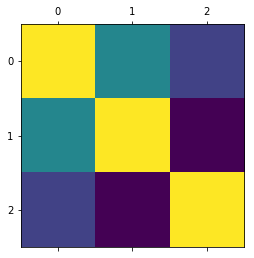

In [17]:
plt.matshow(df.corr())
plt.show()


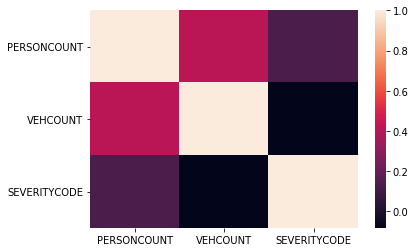

In [18]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr)

In [11]:
# data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts()

SEVERITYCODE  ADDRTYPE    
1             Block           40475
              Intersection    16067
              Alley              96
2             Block           29254
              Intersection    27355
              Alley              29
Name: ADDRTYPE, dtype: int64

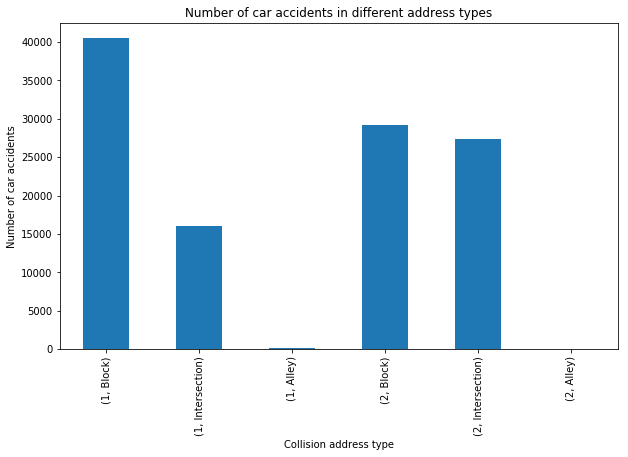

In [20]:
# bar chart
df.groupby(['SEVERITYCODE'])['ADDRTYPE'].value_counts().plot(kind='bar', figsize=(10, 6))

plt.xlabel('Collision address type') # add to x-label to the plot
plt.ylabel('Number of car accidents') # add y-label to the plot
plt.title('Number of car accidents in different address types') # add title to the plot

plt.show()

In [70]:
# df_1 is all type 1 accidents
df_1=df[df['SEVERITYCODE']==1]
df_1_ADD=df_1.groupby(['ADDRTYPE']).count()
df_1_ADD


,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE,log_PERSONCOUNT,log_VEHCOUNT
ADDRTYPE,,,,,,,,,,
Alley,90,90,90,90,90,90,90,90,90,90
Block,40410,40410,40410,40410,40410,40410,40410,40410,40410,40410
Intersection,16138,16138,16138,16138,16138,16138,16138,16138,16138,16138


Text(0.5, 1.0, 'severity type 1: prop damage')

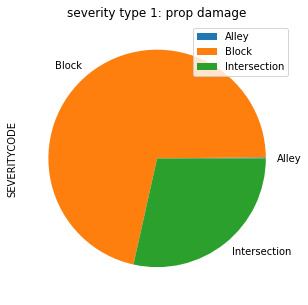

In [71]:
plot = df_1_ADD.plot.pie(y='SEVERITYCODE', figsize=(5, 5))
plt.title('severity type 1: prop damage')

In [74]:
# df_2 is all type 2 accidents
df_2=df[df['SEVERITYCODE']==2]
df_2_ADD=df_2.groupby(['ADDRTYPE']).count()
df_2_ADD


,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE,log_PERSONCOUNT,log_VEHCOUNT
ADDRTYPE,,,,,,,,,,
Alley,29,29,29,29,29,29,29,29,29,29
Block,29254,29254,29254,29254,29254,29254,29254,29254,29254,29254
Intersection,27355,27355,27355,27355,27355,27355,27355,27355,27355,27355


Text(0.5, 1.0, 'severity type 2: injury')

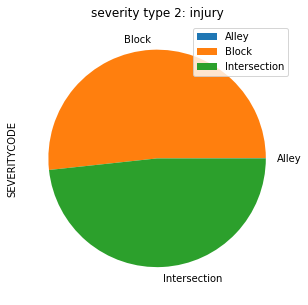

In [75]:
plot = df_2_ADD.plot.pie(y='SEVERITYCODE', figsize=(5, 5))
plt.title('severity type 2: injury')

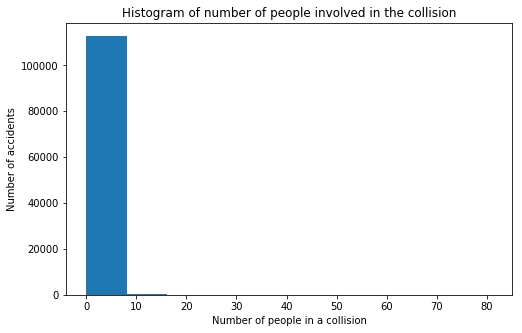

In [60]:
#add other visualization 
df['PERSONCOUNT'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of number of people involved in the collision') # add a title to the histogram
plt.ylabel('Number of accidents') # add y-label
plt.xlabel('Number of people in a collision') # add x-label

plt.show()

In [57]:
#add two columns
df['log_PERSONCOUNT']=np.log(df['PERSONCOUNT']+1)
df['log_VEHCOUNT']=np.log(df['VEHCOUNT']+1)
df.head()

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE,log_PERSONCOUNT,log_VEHCOUNT
0,Intersection,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,N,2,1.098612,1.098612
4,Intersection,2,2,At Intersection (intersection related),Raining,Wet,Daylight,N,2,1.098612,1.098612
5,Intersection,2,2,At Intersection (intersection related),Clear,Dry,Daylight,N,1,1.098612,1.098612
7,Intersection,3,1,At Intersection (intersection related),Clear,Dry,Daylight,N,2,1.386294,0.693147
8,Block,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,N,1,1.098612,1.098612


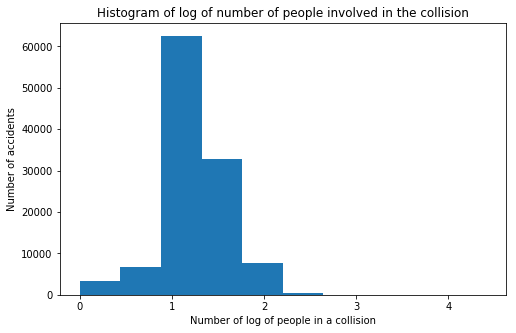

In [61]:
#add other visualization 
df['log_PERSONCOUNT'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of log of number of people involved in the collision') # add a title to the histogram
plt.ylabel('Number of accidents') # add y-label
plt.xlabel('Number of log of people in a collision') # add x-label

plt.show()

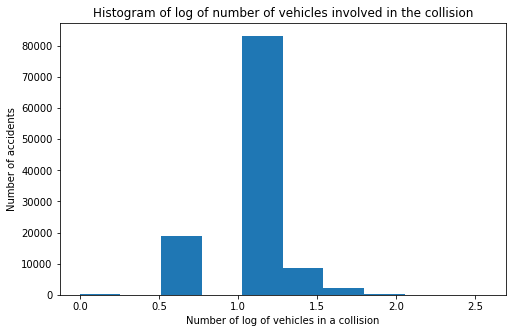

In [62]:
#add other visualization 
df['log_VEHCOUNT'].plot(kind='hist', figsize=(8, 5))
plt.title('Histogram of log of number of vehicles involved in the collision') # add a title to the histogram
plt.ylabel('Number of accidents') # add y-label
plt.xlabel('Number of log of vehicles in a collision') # add x-label

plt.show()

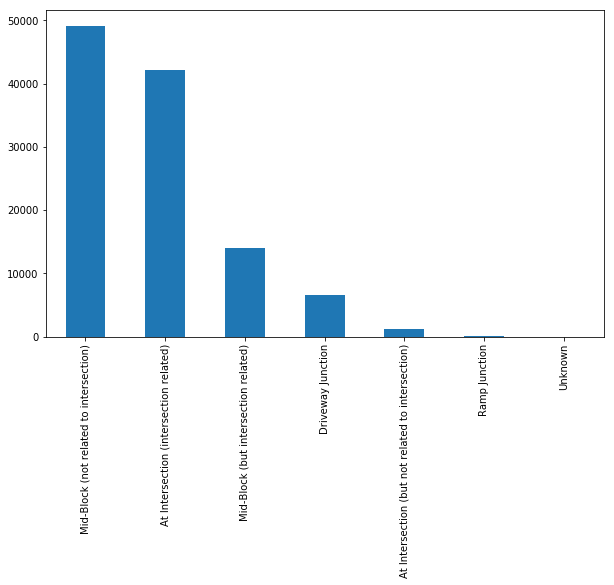

In [64]:
df['JUNCTIONTYPE'].value_counts().plot(kind='bar', figsize=(10, 6))

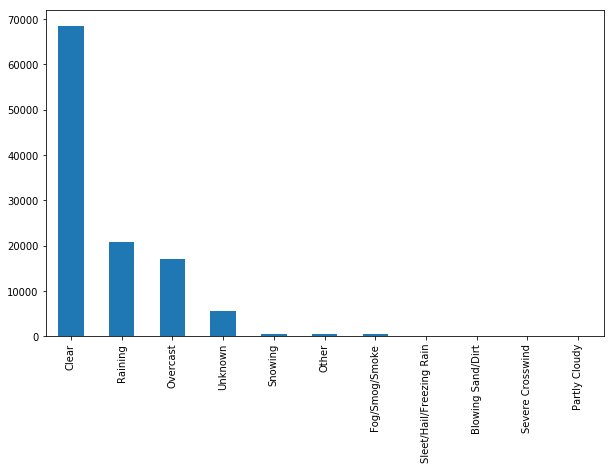

In [65]:
df['WEATHER'].value_counts().plot(kind='bar', figsize=(10, 6))

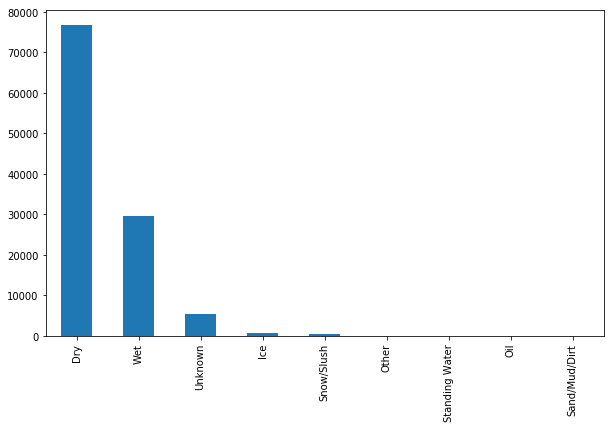

In [66]:
df['ROADCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

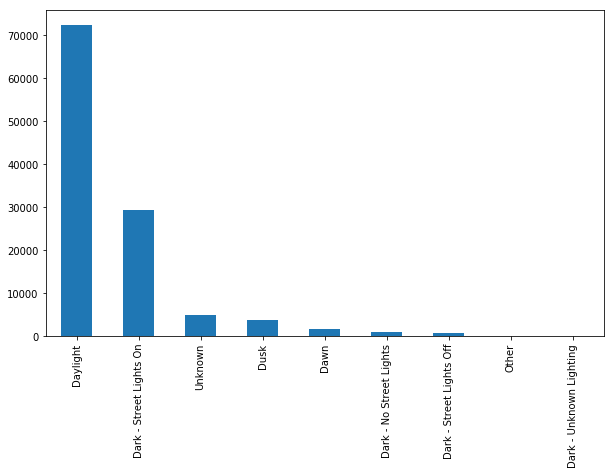

In [67]:
df['LIGHTCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

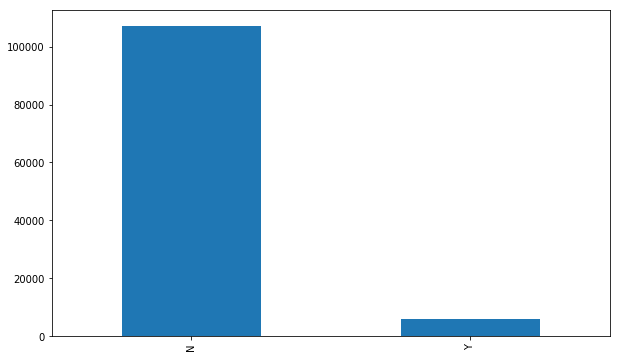

In [68]:
df['SPEEDING'].value_counts().plot(kind='bar', figsize=(10, 6))

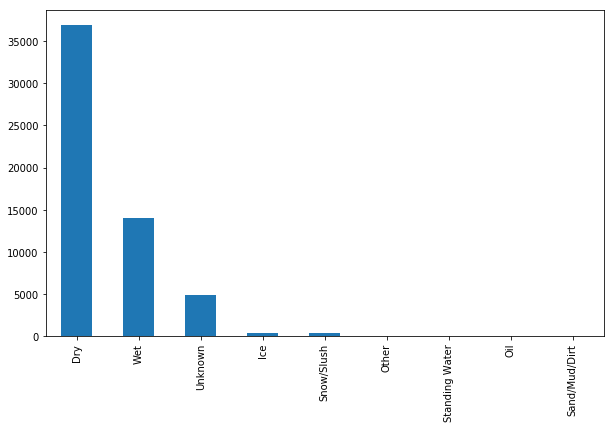

In [72]:
#type 1 roadcondition
df_1['ROADCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

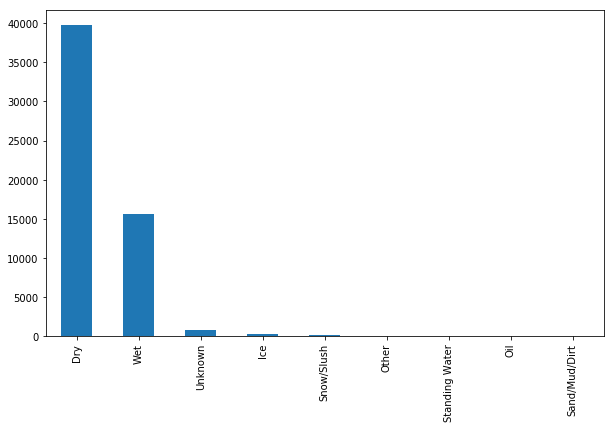

In [76]:
#type 2 roadcondition
df_2['ROADCOND'].value_counts().plot(kind='bar', figsize=(10, 6))

In [19]:
#predictors X
X = df[['ADDRTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].values
X[0:5]

array([['Intersection', 2, 2, 'At Intersection (intersection related)',
        'Overcast', 'Wet', 'Daylight', 'N'],
       ['Intersection', 2, 2, 'At Intersection (intersection related)',
        'Raining', 'Wet', 'Daylight', 'N'],
       ['Intersection', 2, 2, 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight', 'N'],
       ['Intersection', 3, 1, 'At Intersection (intersection related)',
        'Clear', 'Dry', 'Daylight', 'N'],
       ['Block', 2, 2, 'Mid-Block (not related to intersection)',
        'Clear', 'Dry', 'Daylight', 'N']], dtype=object)

In [20]:
#dependent variable 
y = df[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [2],
       [1],
       [2],
       [1]], dtype=int64)

In [134]:
np.ravel(y)

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [21]:
#convert categorical varibales to numerical
from sklearn import preprocessing
ADDRTYPE = preprocessing.LabelEncoder()
ADDRTYPE.fit(['Alley','Block','Intersection'])
X[:,0] = ADDRTYPE.transform(X[:,0]) 
X[0:5]


array([[2, 2, 2, 'At Intersection (intersection related)', 'Overcast',
        'Wet', 'Daylight', 'N'],
       [2, 2, 2, 'At Intersection (intersection related)', 'Raining',
        'Wet', 'Daylight', 'N'],
       [2, 2, 2, 'At Intersection (intersection related)', 'Clear',
        'Dry', 'Daylight', 'N'],
       [2, 3, 1, 'At Intersection (intersection related)', 'Clear',
        'Dry', 'Daylight', 'N'],
       [1, 2, 2, 'Mid-Block (not related to intersection)', 'Clear',
        'Dry', 'Daylight', 'N']], dtype=object)

In [22]:
# find unique values for the JUNCTIONTYPE
np.unique(X[:,3])

array(['At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Unknown'], dtype=object)

In [23]:
JUNCTIONTYPE = preprocessing.LabelEncoder()
JUNCTIONTYPE.fit(np.unique(X[:,3]))
X[:,3] = JUNCTIONTYPE.transform(X[:,3])
X[0:5]

array([[2, 2, 2, 1, 'Overcast', 'Wet', 'Daylight', 'N'],
       [2, 2, 2, 1, 'Raining', 'Wet', 'Daylight', 'N'],
       [2, 2, 2, 1, 'Clear', 'Dry', 'Daylight', 'N'],
       [2, 3, 1, 1, 'Clear', 'Dry', 'Daylight', 'N'],
       [1, 2, 2, 4, 'Clear', 'Dry', 'Daylight', 'N']], dtype=object)

In [24]:
WEATHER = preprocessing.LabelEncoder()
WEATHER.fit(np.unique(X[:,4]))
X[:,4] = WEATHER.transform(X[:,4]) 
X[0:5]

array([[2, 2, 2, 1, 4, 'Wet', 'Daylight', 'N'],
       [2, 2, 2, 1, 6, 'Wet', 'Daylight', 'N'],
       [2, 2, 2, 1, 1, 'Dry', 'Daylight', 'N'],
       [2, 3, 1, 1, 1, 'Dry', 'Daylight', 'N'],
       [1, 2, 2, 4, 1, 'Dry', 'Daylight', 'N']], dtype=object)

In [25]:
ROADCOND = preprocessing.LabelEncoder()
ROADCOND.fit(np.unique(X[:,5]))
X[:,5] = ROADCOND.transform(X[:,5]) 
X[0:5]

array([[2, 2, 2, 1, 4, 8, 'Daylight', 'N'],
       [2, 2, 2, 1, 6, 8, 'Daylight', 'N'],
       [2, 2, 2, 1, 1, 0, 'Daylight', 'N'],
       [2, 3, 1, 1, 1, 0, 'Daylight', 'N'],
       [1, 2, 2, 4, 1, 0, 'Daylight', 'N']], dtype=object)

In [26]:
LIGHTCOND = preprocessing.LabelEncoder()
LIGHTCOND.fit(np.unique(X[:,6]))
X[:,6] = LIGHTCOND.transform(X[:,6]) 
X[0:5]

array([[2, 2, 2, 1, 4, 8, 5, 'N'],
       [2, 2, 2, 1, 6, 8, 5, 'N'],
       [2, 2, 2, 1, 1, 0, 5, 'N'],
       [2, 3, 1, 1, 1, 0, 5, 'N'],
       [1, 2, 2, 4, 1, 0, 5, 'N']], dtype=object)

In [27]:
SPEEDING = preprocessing.LabelEncoder()
SPEEDING.fit(np.unique(X[:,7]))
X[:,7] = SPEEDING.transform(X[:,7]) 
X[0:5]

array([[2, 2, 2, 1, 4, 8, 5, 0],
       [2, 2, 2, 1, 6, 8, 5, 0],
       [2, 2, 2, 1, 1, 0, 5, 0],
       [2, 3, 1, 1, 1, 0, 5, 0],
       [1, 2, 2, 4, 1, 0, 5, 0]], dtype=object)

In [34]:
#visualization 
Xy=np.concatenate((X, y), axis=1)
Xy

array([[2, 2, 2, ..., 5, 0, 2],
       [2, 2, 2, ..., 5, 0, 2],
       [2, 2, 2, ..., 5, 0, 1],
       ...,
       [2, 3, 2, ..., 5, 0, 2],
       [2, 2, 1, ..., 6, 0, 2],
       [1, 2, 2, ..., 5, 0, 1]], dtype=object)

In [35]:
df_n=pd.DataFrame(Xy)
df_n.head()

,0,1,2,3,4,5,6,7,8
0,2,2,2,1,4,8,5,0,2
1,2,2,2,1,6,8,5,0,2
2,2,2,2,1,1,0,5,0,1
3,2,3,1,1,1,0,5,0,2
4,1,2,2,4,1,0,5,0,1


In [36]:
df_n.columns=['ADDRTYPE','PERSONCOUNT','VEHCOUNT','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','SEVERITYCODE']

In [37]:
df_n.head()

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,2,2,2,1,4,8,5,0,2
1,2,2,2,1,6,8,5,0,2
2,2,2,2,1,1,0,5,0,1
3,2,3,1,1,1,0,5,0,2
4,1,2,2,4,1,0,5,0,1


In [40]:
df_n.describe()

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
count,113276,113276,113276,113276,113276,113276,113276,113276,113276
unique,3,42,13,7,11,9,9,2,2
top,1,2,2,4,1,0,5,0,2
freq,69664,62508,83228,49139,68530,76637,72184,107210,56638


In [46]:
df_n.astype('float64')

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
0,2.0,2.0,2.0,1.0,4.0,8.0,5.0,0.0,2.0
1,2.0,2.0,2.0,1.0,6.0,8.0,5.0,0.0,2.0
2,2.0,2.0,2.0,1.0,1.0,0.0,5.0,0.0,1.0
3,2.0,3.0,1.0,1.0,1.0,0.0,5.0,0.0,2.0
4,1.0,2.0,2.0,4.0,1.0,0.0,5.0,0.0,1.0
5,2.0,2.0,2.0,1.0,1.0,0.0,5.0,0.0,2.0
6,0.0,2.0,2.0,2.0,4.0,0.0,5.0,0.0,1.0
7,1.0,0.0,2.0,4.0,6.0,8.0,2.0,0.0,1.0
8,1.0,2.0,2.0,4.0,6.0,8.0,0.0,0.0,1.0
9,1.0,2.0,2.0,4.0,1.0,0.0,2.0,0.0,2.0


In [50]:
corr2=df_n.astype('float64').corr()
corr2

,ADDRTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,SEVERITYCODE
ADDRTYPE,1.000000,0.044230,-0.111450,-0.922847,-0.059699,-0.014534,-0.028500,-0.077800,0.203915
PERSONCOUNT,0.044230,1.000000,0.414838,-0.054093,-0.049067,-0.023689,-0.026781,-0.000886,0.131564
VEHCOUNT,-0.111450,0.414838,1.000000,0.107914,-0.009040,-0.013449,0.037434,-0.024233,-0.081687
JUNCTIONTYPE,-0.922847,-0.054093,0.107914,1.000000,0.069840,0.020552,0.021114,0.082450,-0.214177
WEATHER,-0.059699,-0.049067,-0.009040,0.069840,1.000000,0.755090,0.107737,0.053593,-0.101848
ROADCOND,-0.014534,-0.023689,-0.013449,0.020552,0.755090,1.000000,-0.038605,0.093209,-0.041900
LIGHTCOND,-0.028500,-0.026781,0.037434,0.021114,0.107737,-0.038605,1.000000,-0.096078,-0.048310
SPEEDING,-0.077800,-0.000886,-0.024233,0.082450,0.053593,0.093209,-0.096078,1.000000,0.036076
SEVERITYCODE,0.203915,0.131564,-0.081687,-0.214177,-0.101848,-0.041900,-0.048310,0.036076,1.000000


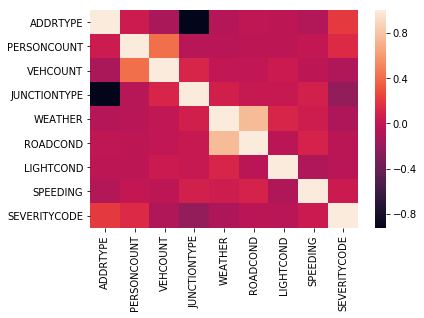

In [51]:
sns.heatmap(corr2)

In [129]:
#convert X to int64
X=X.astype('int64')

In [130]:
#review X
X[0:5]

array([[2, 2, 2, 1, 4, 8, 5, 0],
       [1, 2, 2, 4, 6, 8, 2, 0],
       [1, 4, 3, 4, 4, 0, 5, 0],
       [2, 2, 2, 1, 6, 8, 5, 0],
       [2, 3, 1, 1, 1, 0, 5, 0]], dtype=int64)

In [131]:
#transform X : normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

C:\Users\lbq_h\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lbq_h\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.26444872, -0.37934138,  0.07672227, -1.15328838,  0.43113199,
         1.51740458,  0.42515538, -0.2370161 ],
       [-0.7843525 , -0.37934138,  0.07672227,  1.00852617,  1.19572592,
         1.51740458, -1.4404469 , -0.2370161 ],
       [-0.7843525 ,  1.00296171,  1.72364122,  1.00852617,  0.43113199,
        -0.68315964,  0.42515538, -0.2370161 ],
       [ 1.26444872, -0.37934138,  0.07672227, -1.15328838,  1.19572592,
         1.51740458,  0.42515538, -0.2370161 ],
       [ 1.26444872,  0.31181017, -1.57019669, -1.15328838, -0.71575889,
        -0.68315964,  0.42515538, -0.2370161 ]])

In [135]:
#Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90620, 8) (90620, 1)
Test set: (22656, 8) (22656, 1)


In [137]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [138]:
#build LR model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
yhat = LR.predict(X_test)
yhat

array([2, 1, 2, ..., 1, 2, 1], dtype=int64)

In [140]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.33518823, 0.66481177],
       [0.61995994, 0.38004006],
       [0.47909091, 0.52090909],
       ...,
       [0.56581567, 0.43418433],
       [0.41235137, 0.58764863],
       [0.68249328, 0.31750672]])

In [145]:
#Evaluation
#jaccard index=0.64
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)


0.6389036016949152

In [154]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] >(3/2)* thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[7309 4096]
 [4085 7166]]


Confusion matrix, without normalization
[[7309 4096]
 [4085 7166]]


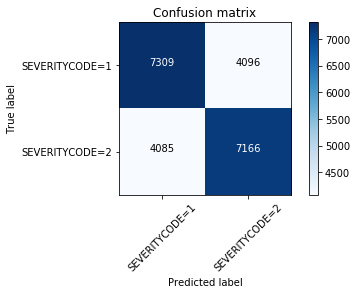

In [155]:
# Compute confusion matrix, sev=SEVERITYCODE
sev_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(sev_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix')

In [147]:
print (classification_report(y_test, yhat))
#precision =0.64;recall=0.64;f1-score=0.64

              precision    recall  f1-score   support

           1       0.64      0.64      0.64     11405
           2       0.64      0.64      0.64     11251

   micro avg       0.64      0.64      0.64     22656
   macro avg       0.64      0.64      0.64     22656
weighted avg       0.64      0.64      0.64     22656



In [148]:
#log loss=0.65
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6460066453197261

In [151]:
# try an second model SVM
from sklearn import svm
sev_svm = svm.SVC(kernel='rbf')
sev_svm.fit(X_train, y_train) 

C:\Users\lbq_h\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [156]:
yhat_svm = sev_svm.predict(X_test)
yhat_svm [0:5]

array([2, 1, 2, 2, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.69      0.58      0.63     11405
           2       0.63      0.74      0.68     11251

   micro avg       0.66      0.66      0.66     22656
   macro avg       0.66      0.66      0.66     22656
weighted avg       0.66      0.66      0.66     22656

Confusion matrix, without normalization
[[6607 4798]
 [2942 8309]]


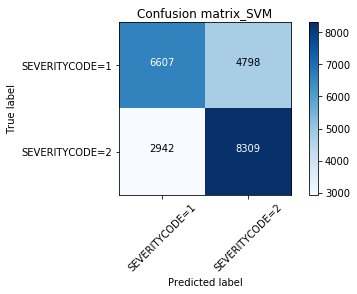

In [157]:
#Evaluation_SVM
# Compute confusion matrix
SVM_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(SVM_matrix, classes=['SEVERITYCODE=1','SEVERITYCODE=2'],normalize= False,  title='Confusion matrix_SVM')

In [158]:
#F1 score for SVM=0.66
from sklearn.metrics import f1_score
f1_score(y_test, yhat_svm, average='weighted') 

0.6562542463245283

In [159]:
#jaccard index for SVM=0.66
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_svm)

0.6583686440677966

In [160]:
#try decision tree
from sklearn.tree import DecisionTreeClassifier
sevTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
sevTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [161]:
predTree = sevTree.predict(X_test)

In [162]:
#Evaluation,DecisionTrees's Accuracy:  0.6583686440677966
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6583686440677966


In [163]:
#K-Nearest Neighbors
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [164]:
#choose k value
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KNN)

    
    std_acc[n-1]=np.std(yhat_KNN==y_test)/np.sqrt(yhat_KNN.shape[0])

mean_acc

array([0.59, 0.62, 0.62, 0.64, 0.65, 0.64, 0.64, 0.64, 0.65])

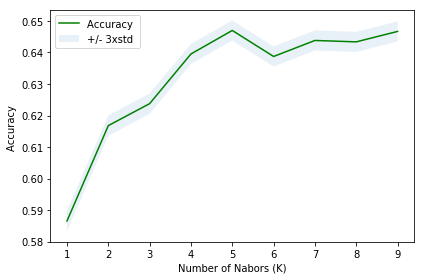

In [165]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [166]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6469809322033898 with k= 5


In [167]:
# KNN with k=5
k = 5
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat5KNN = neigh5.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat5KNN))
#Train set Accuracy:  0.6570514235268152
#Test set Accuracy:  0.6469809322033898

Train set Accuracy:  0.6570514235268152
Test set Accuracy:  0.6469809322033898
